<a href="https://colab.research.google.com/github/Takuto2345/adV2025.task/blob/main/2025fasion_dp_mist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

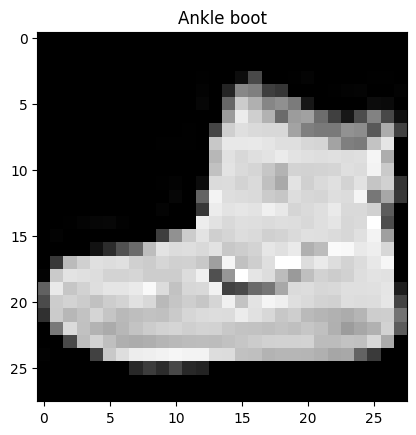

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. ファッションデータの読み込み
f_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = f_mnist.load_data()

# ラベル名（数字だと分かりにくいので名前を定義）
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 正規化とリシェイプ
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# どんな画像か1枚見てみる
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(class_names[y_train[0]])
plt.show()

In [10]:
model = models.Sequential([
    # 畳み込み層：特徴を見つける

    layers.Input(shape=(28, 28, 1)),


    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    ##↓最新のバージョンのTensorflowの書き方よろしくないらしい
    ##layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    #layers.MaxPooling2D((2, 2)),

    # 畳み込み層2：より複雑な特徴を捉える
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 全結合層：分類を行う
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # 0~9の10クラス
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # モデルの構造を表示

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 学習の開始
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6857 - loss: 0.8774 - val_accuracy: 0.8463 - val_loss: 0.4059
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8291 - loss: 0.4705 - val_accuracy: 0.8741 - val_loss: 0.3363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8581 - loss: 0.3882 - val_accuracy: 0.8895 - val_loss: 0.3125
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8721 - loss: 0.3542 - val_accuracy: 0.8907 - val_loss: 0.3061
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8835 - loss: 0.3194 - val_accuracy: 0.8975 - val_loss: 0.2801


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


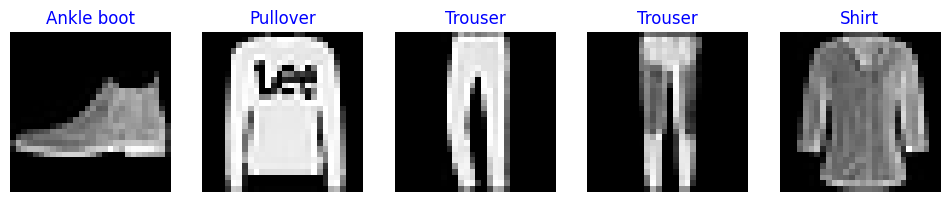

In [12]:
# テストデータの予測
predictions = model.predict(x_test[:5])

plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    predict_idx = predictions[i].argmax()
    true_idx = y_test[i]

    # 予測が合ってれば青、間違ってれば赤
    color = 'blue' if predict_idx == true_idx else 'red'
    plt.title(f"{class_names[predict_idx]}", color=color)
    plt.axis('off')
plt.show()

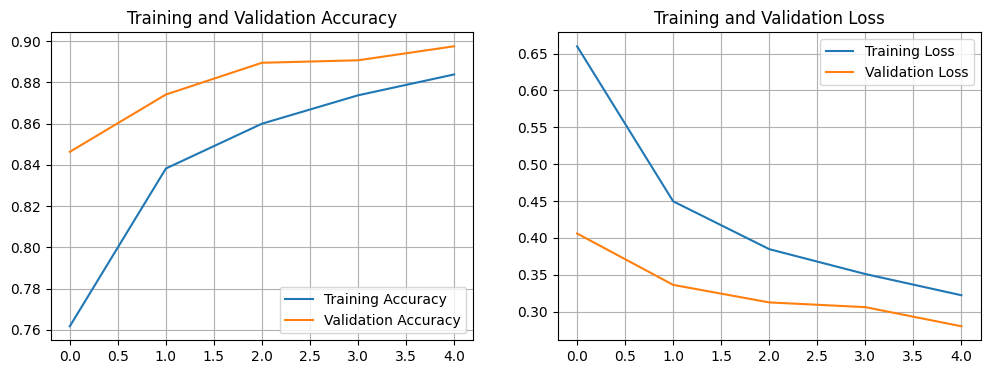

In [13]:
# 学習経過（精度と損失）をグラフで表示
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# 精度の推移
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()

# 損失の推移
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.grid()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


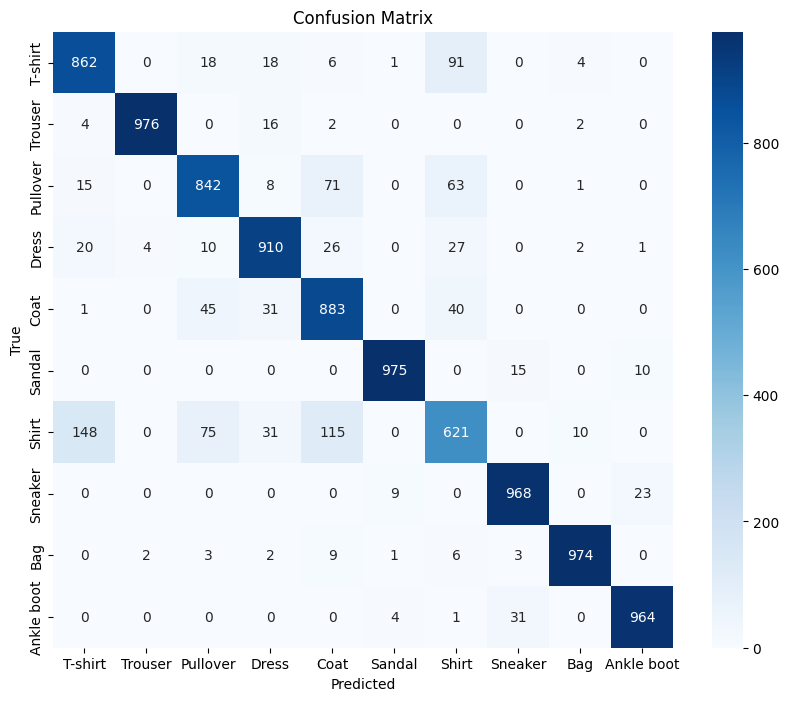

In [14]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 混同行列の作成
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()